In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
initial_data = pd.read_csv('DATA_hourly_result.csv', thousands= r',', sep = ";") #reading of our data into the program


In [12]:
initial_data.head(5) #printing the first 5 lines of the data to see if pd.read worked and the data is displayed correctly.

,Timestamp,Timestamp numerical,daytime,WR I Energy positiv [Ws],WR III Energy positiv [Ws],Sum Energy positiv [Ws],Sum Energy positiv [kWh],dt_iso +0000 UTC,temp,feels_like,...,humidity,wind_speed,wind_deg,rain_1h,snow_1h,clouds_all,weather_id,weather_main,weather_description,Unnamed: 22
0,22.09.2020 13:00,44096.5417,13,98400000.0,99300000.0,198000000.0,0.55,22.09.2020 13:00,296.61,296.56,...,57,2.1,150,NaN,NaN,20,801,Clouds,few clouds,02d
1,22.09.2020 14:00,44096.5833,14,103000000.0,100000000.0,203000000.0,0.56,22.09.2020 14:00,296.53,296.04,...,60,3.1,140,NaN,NaN,20,801,Clouds,few clouds,02d
2,22.09.2020 15:00,44096.6250,15,63600000.0,55300000.0,119000000.0,0.33,22.09.2020 15:00,295.76,294.66,...,60,3.6,160,NaN,NaN,20,801,Clouds,few clouds,02d
3,22.09.2020 16:00,44096.6667,16,45600000.0,41800000.0,87400000.0,0.24,22.09.2020 16:00,293.79,292.74,...,64,3.1,150,NaN,NaN,20,801,Clouds,few clouds,02d
4,22.09.2020 17:00,44096.7083,17,12600000.0,13700000.0,26300000.0,0.07,22.09.2020 17:00,291.59,290.80,...,72,2.6,110,NaN,NaN,20,801,Clouds,few clouds,02n


It seems like the data was read correctly! By closer examination of the data we limited the variables for analysation to "Timestamp Numerical","daytime","temp","feels_like","temp_min","temp_max","humidity","wind_speed","clouds_all". As a next step we will analyze our data with seaborn sns.pairplot function.


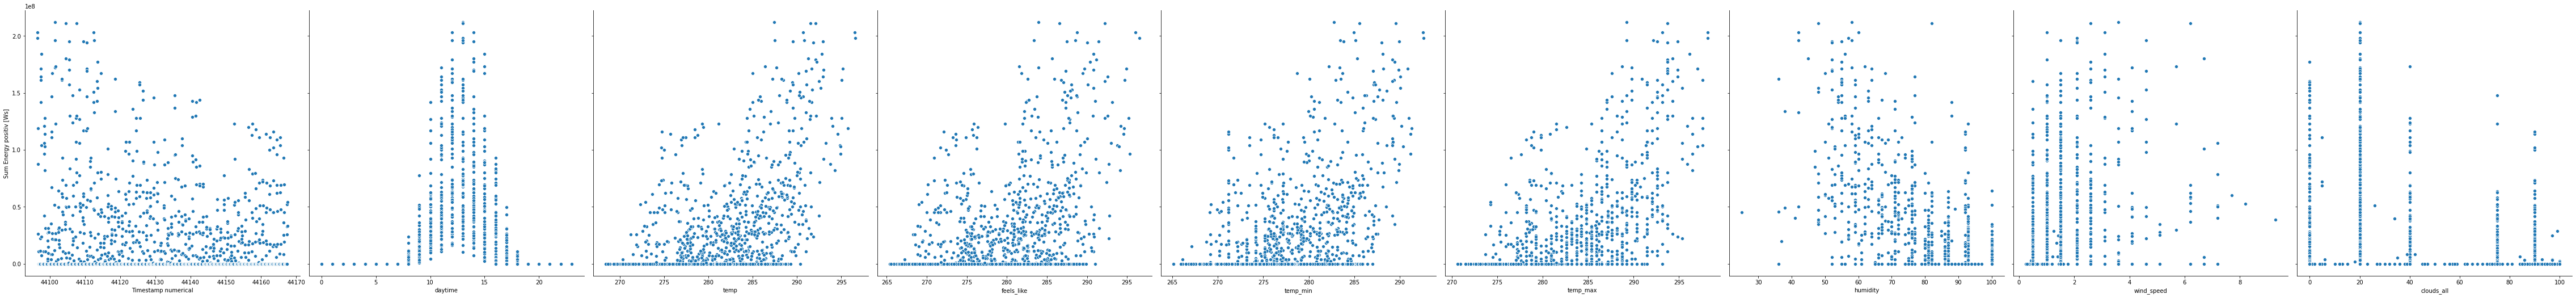

In [4]:
sns.pairplot(initial_data, height = 7, y_vars=["Sum Energy positiv [Ws]"], 
             x_vars=["Timestamp numerical","daytime","temp","feels_like","temp_min","temp_max","humidity","wind_speed","clouds_all"])

Unfortunately, we can already see that the correlation between our variables and the energy production is pretty low. We can expect a rather minor outcome of our model, which is due to the lack of good weather data for us. Nonetheless we will conduct the model creation with this data in the next steps below. The variables we believe to have the best outcome are: "daytime", "temp" and "clouds_all".

In [5]:
import sklearn as sk
X=initial_data[['daytime','temp','clouds_all']] # capital X is per definition the input dataset 

y=initial_data['Sum Energy positiv [Ws]'] # y is per definition the output dataset

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42) # rule of thumb: 20-30 % of data for testing


In [7]:
# training the model
from sklearn.linear_model import LinearRegression

model=LinearRegression()
model.fit(X_train,y_train) #model uses the train dataset -> 80 % (1 - test_size) of data to learn

LinearRegression()

In [8]:
# We want the model to predict y (=price) by giving the input of X_test
# in predictions is the predicted y-value. in y_test is the correct value for the price
predictions = model.predict(X_test) # X_test contains input values for testing

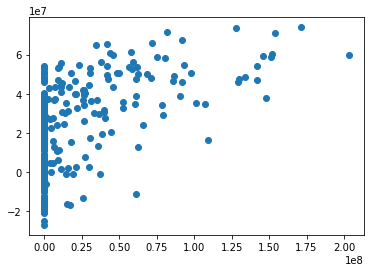

In [9]:
# first evaluation:
# Comparing the true values/prices (y_test) with the predicted values: A straight line would be perfect.

plt.scatter(y_test,predictions)

This evaluation proves our initial concerns to be right, a straight line could not be seen here, indicating our model not to be very accurate. We will conduct further evaluation below: 

In [13]:
# further evaluation:
#R^2
r_eval=sk.metrics.r2_score(y_test,predictions)

#RMSE
RMSE = np.sqrt(sk.metrics.mean_squared_error(y_test,predictions))

In [14]:
print("The MAE is {}".format(r_eval)) 
print("The RMSE is {}".format(RMSE))

The MAE is 0.3057445522166845
The RMSE is 29373085.70821218


With the MAE at roughly 30%, our model is not very accurate with the current weather data. Maybe with calculation otions other than LinearRegression, the accuracy of the model can be improved:

In [16]:
from sklearn.linear_model import Ridge

model1 = Ridge(alpha = .5)
model1.fit(X_train, y_train)

Ridge(alpha=0.5)

In [17]:
predictions1 = model1.predict(X_test)

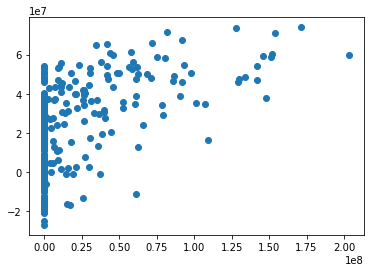

In [21]:
plt.scatter(y_test,predictions1)

In [22]:
# further evaluation:
#R^2
r_eval=sk.metrics.r2_score(y_test,predictions1)

#RMSE
RMSE = np.sqrt(sk.metrics.mean_squared_error(y_test,predictions1))

In [23]:
print("The MAE is {}".format(r_eval)) 
print("The RMSE is {}".format(RMSE))

The MAE is 0.30574544644909507
The RMSE is 29373066.79127477


Ridge regression addresses some of the problems of Ordinary Least Squares by imposing a penalty on the size of the coefficients. 

For our model, this method brings no real improvement.